# 01 Basic Tradeoff Plots

Recall/latency and IO/latency tradeoffs.


In [1]:
from pathlib import Path
import os
import pandas as pd
import numpy as np

ANALYZE_DIR = Path('../outputFiles/analyze').resolve()
REPORT_PREFIX = os.environ.get('REPORT_PREFIX', 'analysis_reports')
REPORT_DIR = (Path('../outputFiles/analyze').resolve() / REPORT_PREFIX)
STATS_CSV = None  # set to a specific file path if needed
TOPK_CSV = None   # set to a specific file path if needed

def pick_latest(pattern):
    files = sorted(ANALYZE_DIR.glob(pattern))
    if not files:
        raise FileNotFoundError(f'No files matched: {pattern}')
    return files[-1]

stats_path = Path(STATS_CSV) if STATS_CSV else pick_latest('collected_stats_*.csv')
topk_path = Path(TOPK_CSV) if TOPK_CSV else pick_latest('collected_topk_*.csv')

print('stats:', stats_path)
print('topk :', topk_path)

stats_df = pd.read_csv(stats_path)
topk_df = pd.read_csv(topk_path)


stats: /home/gt/research/DiskANN/scripts/paramAnalysis/gridSearch/outputFiles/analyze/collected_stats_exp01_20260101_235226.csv
topk : /home/gt/research/DiskANN/scripts/paramAnalysis/gridSearch/outputFiles/analyze/collected_topk_exp01_20260101_235226.csv


In [2]:
merged = stats_df.merge(topk_df, on='run_prefix', how='left', suffixes=('', '_topk'))
merged.head()


,id,dataset_name,data_type,build_R,build_L,build_B,build_M,search_K,search_L,search_W,...,topk_degree_p25,topk_degree_p50,topk_degree_p75,topk_degree_p90,topk_degree_p95,topk_degree_p99,topk_cover_ratio,topk_neighbors_path,topk_nodes_path,summary_stats_path
0,1,siftsmall,float,128,256,0.2,1.0,10,10,1,...,128.0,128.0,128.0,128.0,128.0,128.0,0.13033,/home/gt/research/DiskANN/scripts/paramAnalysi...,/home/gt/research/DiskANN/scripts/paramAnalysi...,/home/gt/research/DiskANN/scripts/paramAnalysi...
1,2,siftsmall,float,128,256,0.2,1.0,10,10,1,...,128.0,128.0,128.0,128.0,128.0,128.0,0.13033,/home/gt/research/DiskANN/scripts/paramAnalysi...,/home/gt/research/DiskANN/scripts/paramAnalysi...,/home/gt/research/DiskANN/scripts/paramAnalysi...
2,3,siftsmall,float,128,256,0.2,1.0,10,10,1,...,128.0,128.0,128.0,128.0,128.0,128.0,0.13033,/home/gt/research/DiskANN/scripts/paramAnalysi...,/home/gt/research/DiskANN/scripts/paramAnalysi...,/home/gt/research/DiskANN/scripts/paramAnalysi...
3,4,siftsmall,float,128,256,0.2,1.0,10,10,1,...,128.0,128.0,128.0,128.0,128.0,128.0,0.13033,/home/gt/research/DiskANN/scripts/paramAnalysi...,/home/gt/research/DiskANN/scripts/paramAnalysi...,/home/gt/research/DiskANN/scripts/paramAnalysi...
4,5,siftsmall,float,128,256,0.2,1.0,10,10,1,...,128.0,128.0,128.0,128.0,128.0,128.0,0.13033,/home/gt/research/DiskANN/scripts/paramAnalysi...,/home/gt/research/DiskANN/scripts/paramAnalysi...,/home/gt/research/DiskANN/scripts/paramAnalysi...


In [3]:
# Load filtered dataset if available
filtered_path = (REPORT_DIR / 'tables' / 'filtered_stats.csv')
filtered_df = None
if filtered_path.exists():
    filtered_df = pd.read_csv(filtered_path)
    print('filtered:', filtered_path)
else:
    print('filtered not found:', filtered_path)


filtered: /home/gt/research/DiskANN/scripts/paramAnalysis/gridSearch/outputFiles/analyze/exp01_reports/tables/filtered_stats.csv


Saved figures to /home/gt/research/DiskANN/scripts/paramAnalysis/gridSearch/outputFiles/analyze/exp01_reports/figures


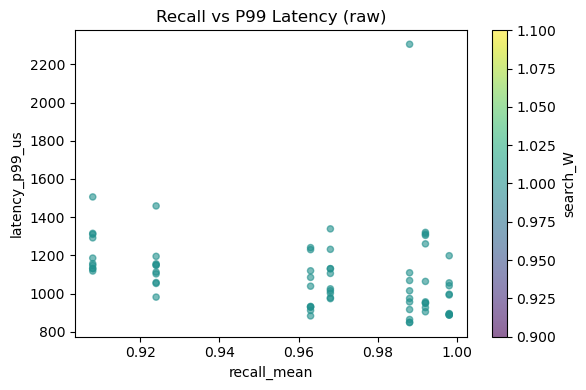

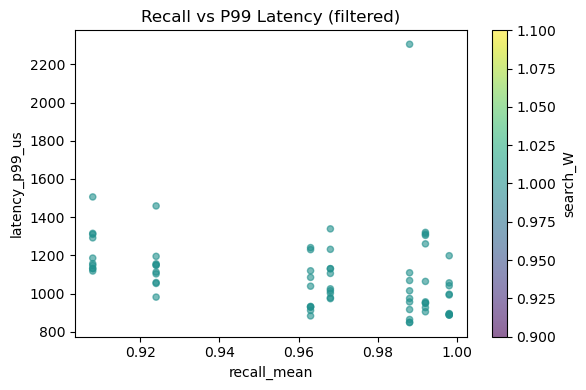

In [4]:
import matplotlib.pyplot as plt

fig_dir = (REPORT_DIR / 'figures')
fig_dir.mkdir(parents=True, exist_ok=True)

# Raw
ax = merged.plot.scatter(x='recall_mean', y='latency_p99_us', c='search_W',
                         cmap='viridis', alpha=0.6, figsize=(6, 4))
ax.set_title('Recall vs P99 Latency (raw)')
plt.tight_layout()
plt.savefig(fig_dir / 'recall_vs_latency_p99_raw.png', dpi=150)

# Filtered
if filtered_df is not None:
    ax = filtered_df.plot.scatter(x='recall_mean', y='latency_p99_us', c='search_W',
                                 cmap='viridis', alpha=0.6, figsize=(6, 4))
    ax.set_title('Recall vs P99 Latency (filtered)')
    plt.tight_layout()
    plt.savefig(fig_dir / 'recall_vs_latency_p99_filtered.png', dpi=150)

print('Saved figures to', fig_dir)


Saved figures to /home/gt/research/DiskANN/scripts/paramAnalysis/gridSearch/outputFiles/analyze/exp01_reports/figures


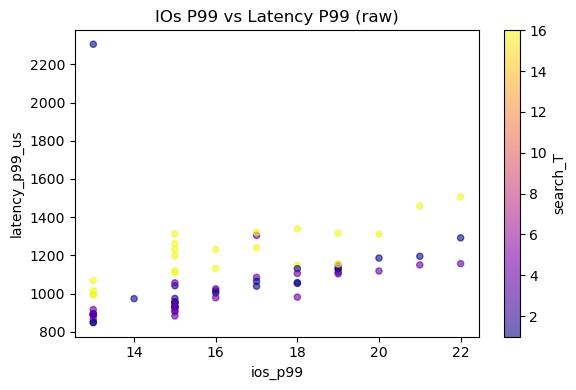

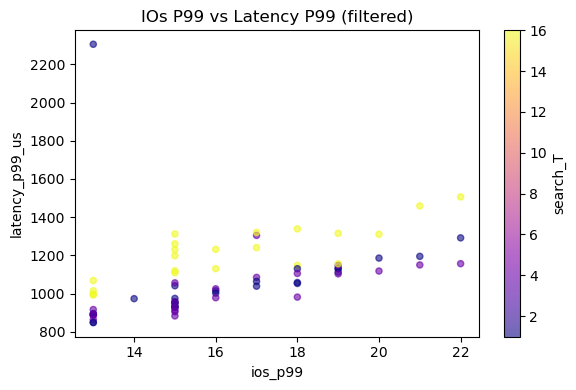

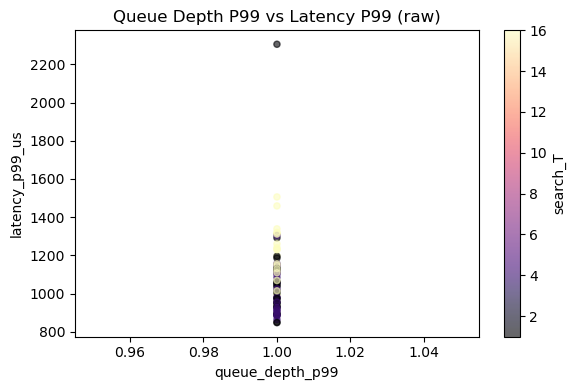

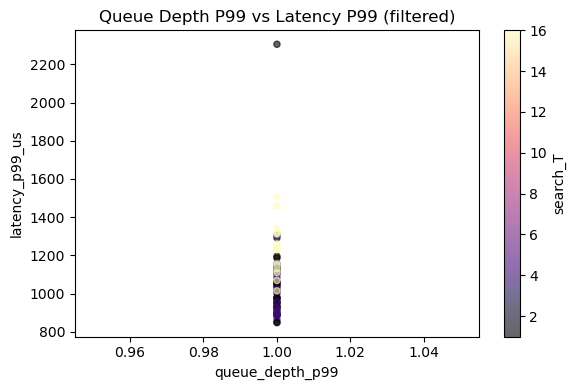

In [5]:
import matplotlib.pyplot as plt
fig_dir = (REPORT_DIR / 'figures')
fig_dir.mkdir(parents=True, exist_ok=True)

# Raw ios_p99 vs latency_p99
ax = merged.plot.scatter(x='ios_p99', y='latency_p99_us', c='search_T',
                         cmap='plasma', alpha=0.6, figsize=(6, 4))
ax.set_title('IOs P99 vs Latency P99 (raw)')
plt.tight_layout()
plt.savefig(fig_dir / 'ios_p99_vs_latency_p99_raw.png', dpi=150)

if filtered_df is not None:
    ax = filtered_df.plot.scatter(x='ios_p99', y='latency_p99_us', c='search_T',
                             cmap='plasma', alpha=0.6, figsize=(6, 4))
    ax.set_title('IOs P99 vs Latency P99 (filtered)')
    plt.tight_layout()
    plt.savefig(fig_dir / 'ios_p99_vs_latency_p99_filtered.png', dpi=150)

# Raw queue depth vs latency
ax = merged.plot.scatter(x='queue_depth_p99', y='latency_p99_us', c='search_T',
                         cmap='magma', alpha=0.6, figsize=(6, 4))
ax.set_title('Queue Depth P99 vs Latency P99 (raw)')
plt.tight_layout()
plt.savefig(fig_dir / 'queue_p99_vs_latency_p99_raw.png', dpi=150)

if filtered_df is not None:
    ax = filtered_df.plot.scatter(x='queue_depth_p99', y='latency_p99_us', c='search_T',
                             cmap='magma', alpha=0.6, figsize=(6, 4))
    ax.set_title('Queue Depth P99 vs Latency P99 (filtered)')
    plt.tight_layout()
    plt.savefig(fig_dir / 'queue_p99_vs_latency_p99_filtered.png', dpi=150)

print('Saved figures to', fig_dir)
